In [ ]:
#   !pip install numpy

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv




In [19]:

#   USE ESPONENTIAL OR CONSTANT
use_exp = False

if use_exp == True:
    distribution = "Exp"
elif use_exp == False:
    distribution = "Con"

#   target_tso = ["50"]
detailed = True
if detailed == True :
    target_tso = list(range(24, 51+1, 3) )
else :
    if use_exp == True :
        target_tso = ["25","30","35", "40", "45", "50"]
    elif use_exp == False:
        target_tso = ["25","30","35", "40", "45", "50"]


# USE ALL ITERATIONS OR ONLY FIRST
num_iterations = 30
use_all = True

target_tn = 30


# PROBABILITY
probability = 50

In [20]:
print(target_tso)

[24, 27, 30, 33, 36, 39, 42, 45, 48, 51]


In [21]:
#   run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,vectime,vecvalue

#   testS3ExpP50_24_all.csv

#   scalar,J_Network.server_0,completedJob:mean
#   target_tso = ["24"]
    
r1 = "scalar"
r2 = "J_Network.server_"
r3 = "completedJob:mean"
server_names = [0, 1]

general_array = []
for srvn in range(0, len(server_names)):
    jrespTime_all_tsos = []
    for tso_this_iter in range(0, len(target_tso), 1) :
        #   print(tso_this_iter)
        jrespTime_all_this_tso = []
        file_name_csv = f'testS3{distribution}P{probability}_{target_tso[tso_this_iter]}_all.csv'

        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            repetitions_counter = 0
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                    #   print("hit row : ", row)
                    #   hit row :  ['testExpP50-0-20240111-20:04:46-18804', 'scalar', 'J_Network.server_0', 'completedJob:mean', '', '', '2386.8933293034', '', '', '', '', '', '', '', '']
                    #   print("listed row : ", rigaTarget)
                    #   print("len : ", len(rigaTarget))    #   15 .
                    
                    this_row_mean = float( rigaTarget[6] )
                    jrespTime_all_this_tso.append(this_row_mean)
                    
                    print("mean : ", this_row_mean , " ; repetitions_counter : ", repetitions_counter)
                    repetitions_counter += 1
                    
                    if use_all == False:
                        print("break")
                        break
        
        jrespTime_all_tsos.append(jrespTime_all_this_tso)
        print(f'{file_name_csv} _ len : {len(jrespTime_all_tsos[tso_this_iter])}' )
    general_array.append(jrespTime_all_tsos)

mean :  1440.0  ; repetitions_counter :  0
mean :  1440.0  ; repetitions_counter :  1
mean :  1440.0  ; repetitions_counter :  2
mean :  1440.0  ; repetitions_counter :  3
mean :  1440.0  ; repetitions_counter :  4
mean :  1440.0  ; repetitions_counter :  5
mean :  1440.0  ; repetitions_counter :  6
mean :  1440.0  ; repetitions_counter :  7
mean :  1440.0  ; repetitions_counter :  8
mean :  1440.0  ; repetitions_counter :  9
mean :  1440.0  ; repetitions_counter :  10
mean :  1440.0  ; repetitions_counter :  11
mean :  1440.0  ; repetitions_counter :  12
mean :  1440.0  ; repetitions_counter :  13
mean :  1440.0  ; repetitions_counter :  14
mean :  1440.0  ; repetitions_counter :  15
mean :  1440.0  ; repetitions_counter :  16
mean :  1440.0  ; repetitions_counter :  17
mean :  1440.0  ; repetitions_counter :  18
mean :  1440.0  ; repetitions_counter :  19
mean :  1440.0  ; repetitions_counter :  20
mean :  1440.0  ; repetitions_counter :  21
mean :  1440.0  ; repetitions_counter :  2

In [ ]:
#   import pickle

In [ ]:
#   with open('./saving', 'wb') as file_pi:
#       pickle.dump(jqTime_all_tsos, file_pi)


In [ ]:
#   with open('./saving', "rb") as file_pi:
#       jqTime_all_tsos = pickle.load(file_pi)
    

In [22]:
def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.01):
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = z * stdev / np.sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color=color)

    #   plt.plot( [x,x] , [top, top] , color = '#052BFF')

    return mean, confidence_interval

this_mean :  1440.0
this_mean :  1620.0
this_mean :  1800.0
this_mean :  2070.0
this_mean :  2340.0
this_mean :  2610.0
this_mean :  2880.0
this_mean :  3150.1270513499207
this_mean :  167580.0
this_mean :  312654.126126126


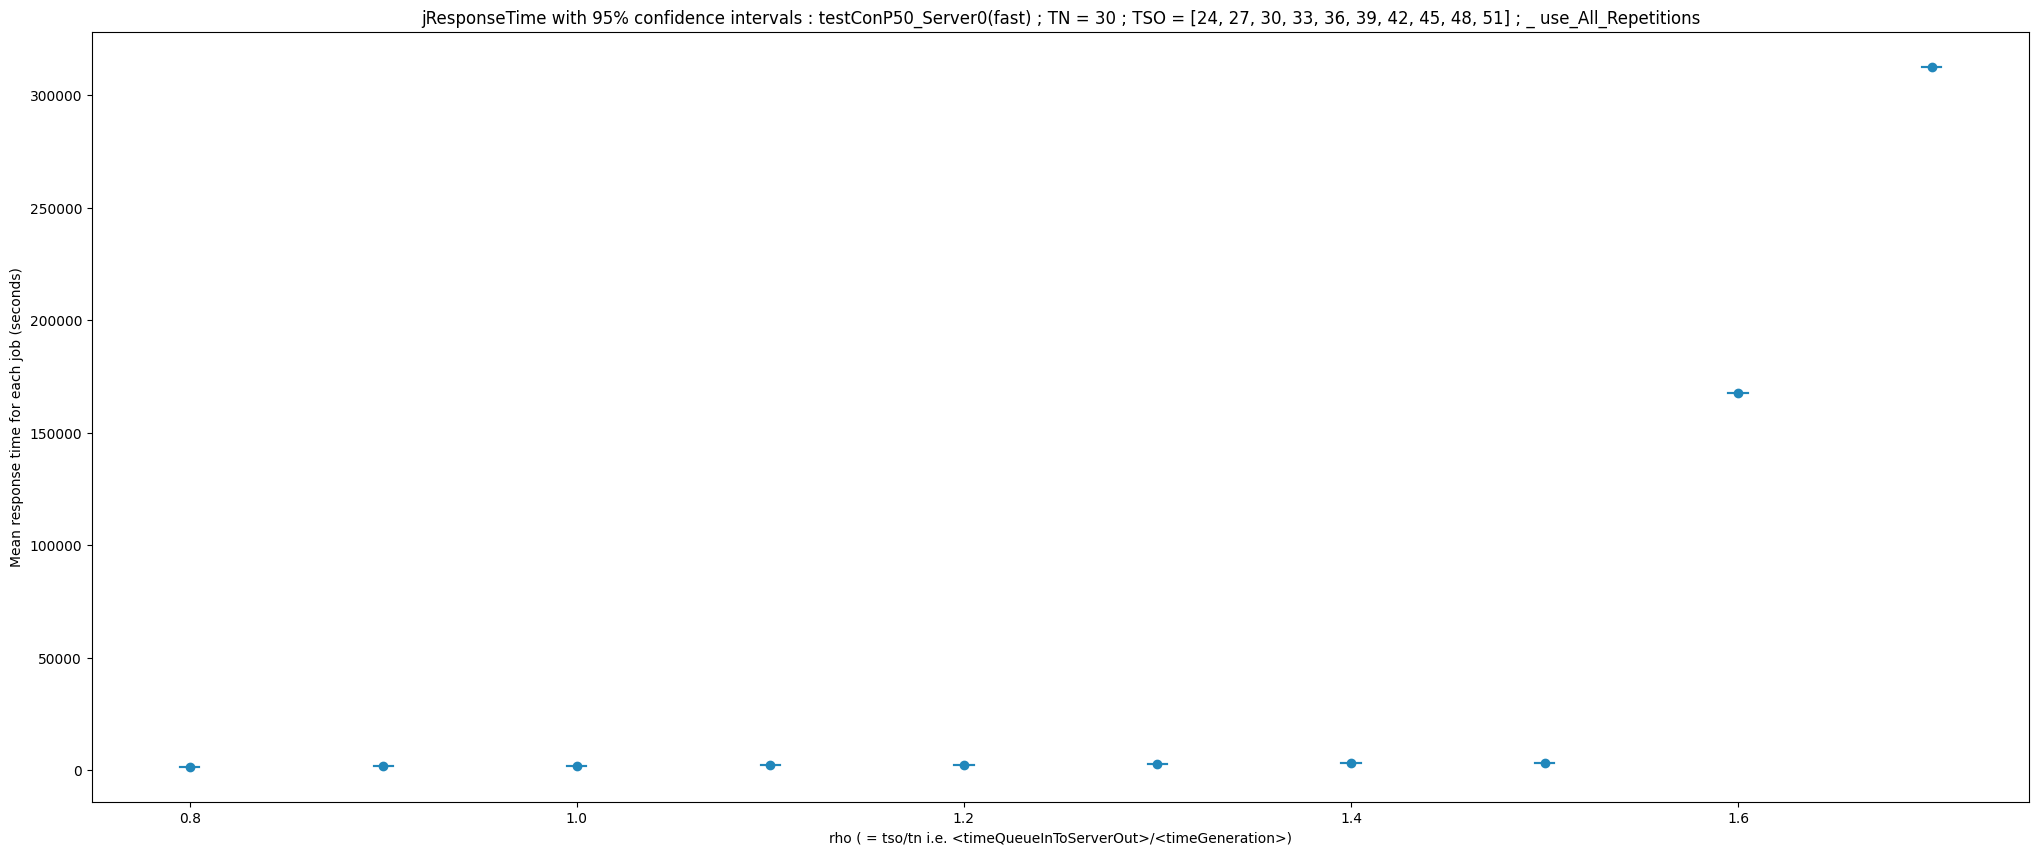

this_mean :  2880.0
this_mean :  3240.0
this_mean :  3600.0
this_mean :  3960.0
this_mean :  4320.0
this_mean :  4680.0
this_mean :  5040.0
this_mean :  5400.0
this_mean :  169920.0
this_mean :  315000.0


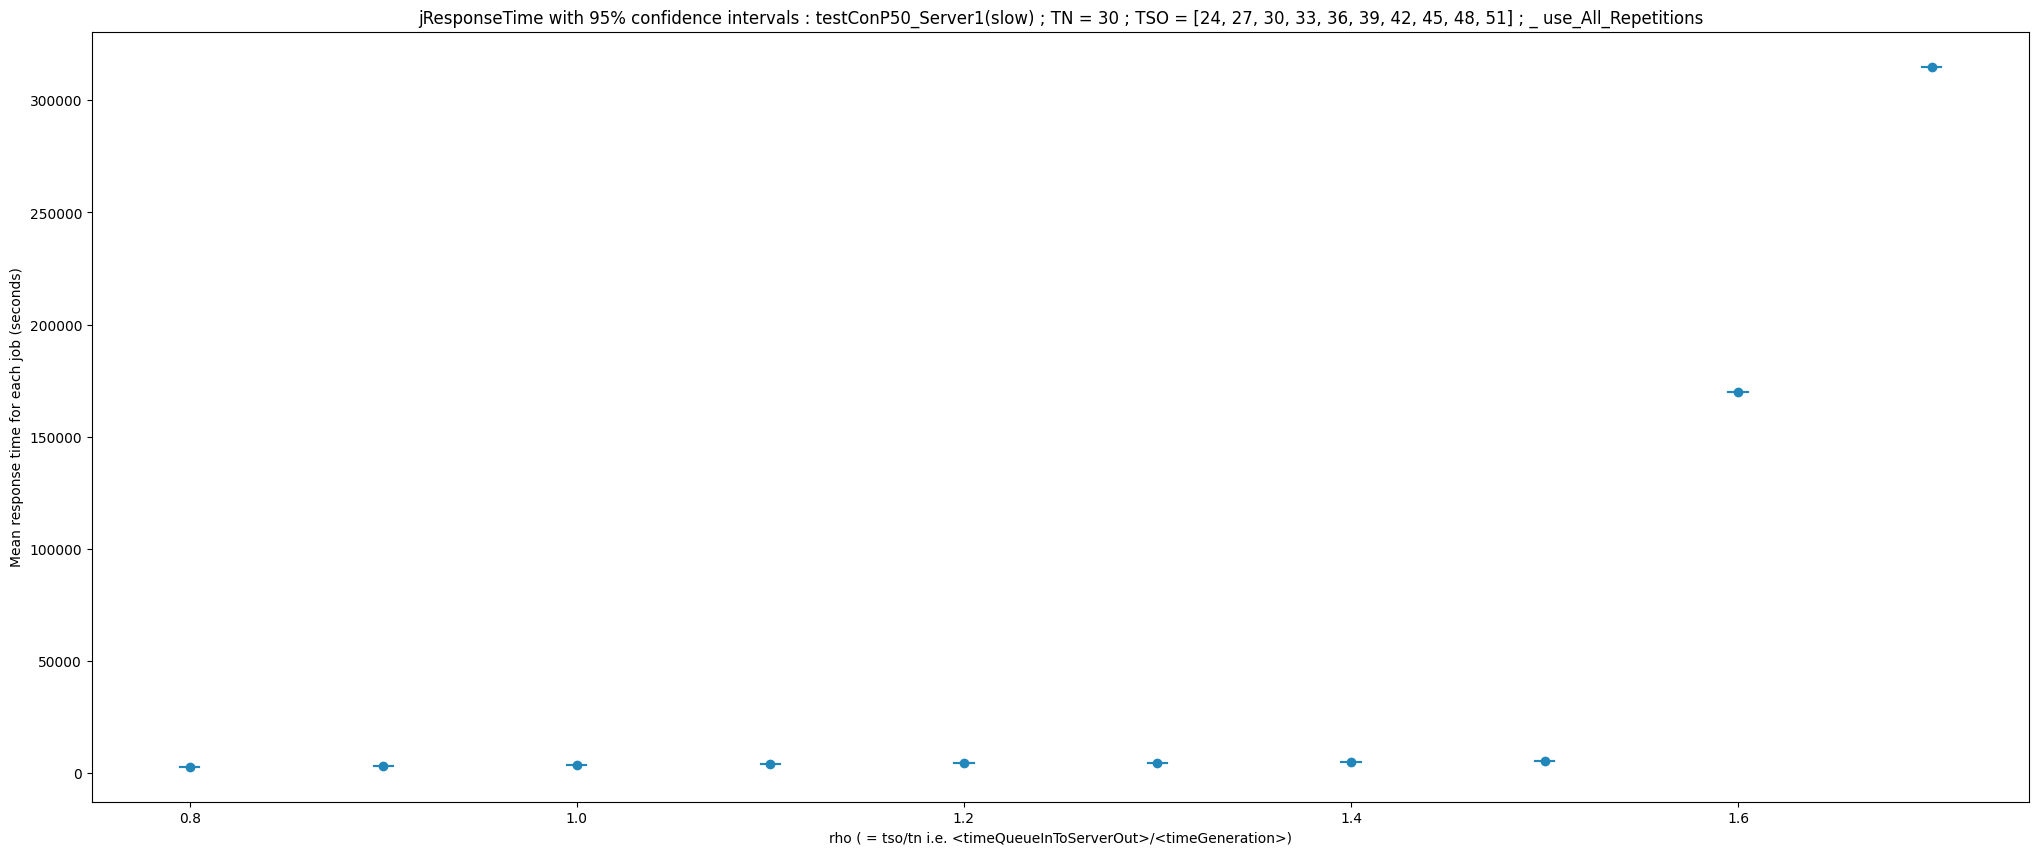

In [23]:
#	we studying completed job mean time !
#	#	r1 = "scalar"
#	#	r2 = "J_Network.server_"
#	#	r3 = "completedJob:mean"

plot_dir = f'../images/plots' 

for srvn in range(0, len(server_names)):
	plt.rcParams["figure.figsize"] = (25, 10)
	for tso_this_iter in range(0, len(target_tso), 1) :
		this_tso_averages = general_array[srvn][tso_this_iter]
		#	print(this_tso_averages)
		#	print("tipo di this_tso_averages : ", type(this_tso_averages))
		#	print("tipo di this_tso_averages[0] : ", type(this_tso_averages[0]))
		#	print("tipo di target_tn : ", type(target_tn))
		#	#	tipo di this_tso_averages :  <class 'list'>
		#	#	tipo di this_tso_averages[0] :  <class 'float'>
		#	#	tipo di target_tn :  <class 'float'>
		this_mean , this_conf_int = plot_confidence_interval( float(target_tso[tso_this_iter])/float(target_tn) , np.array(this_tso_averages))
		print("this_mean : ", this_mean)
		#	print(this_conf_int)

	#	rho = np.linspace(0.05, 2, 100)
	#	rho = rho 
	#	plt.plot(rho, rho**2/(1-rho)   , color='r', label="rho^2/(1-rho)")
	#	plt.legend(loc="upper left")
		
	extras = ["fast", "slow"]
	name = f'jResponseTime with 95% confidence intervals : test{distribution}P{probability}_Server{srvn}({extras[srvn]})'
	if use_all == True: 
		plt.title(f"{name} ; TN = 30 ; TSO = {target_tso} ; _ use_All_Repetitions")
        

	plt.ylabel("Mean response time for each job (seconds)")
	plt.xlabel("rho ( = tso/tn i.e. <timeQueueInToServerOut>/<timeGeneration>)")
     
	save = False
	if save == True:
		if use_all == True: 
			plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_Server{srvn}.png')
		else :
			plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_onlyIterZero_Server{srvn}.png')
	
	plt.show()





In [25]:
print("before merge")
print(general_array[0][7])
print(general_array[1][7])

print(len(general_array[0][7]))
print(len(general_array[1][7]))

before merge
[3150.0, 3150.2382212811, 3150.2382212811, 3150.2382212811, 3150.0, 3150.2382212811, 3150.0, 3150.0, 3150.0, 3150.2382212811, 3150.0, 3150.0, 3150.2382212811, 3150.2382212811, 3150.0, 3150.2382212811, 3150.2382212811, 3150.0, 3150.2382212811, 3150.2382212811, 3150.0, 3150.2382212811, 3150.0, 3150.0, 3150.2382212811, 3150.0, 3150.2382212811, 3150.2382212811, 3150.2382212811, 3150.0]
[5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0, 5400.0]
30
30


# MERGE

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv


In [48]:
#   USE ESPONENTIAL OR CONSTANT
use_exp = True

if use_exp == True:
    distribution = "Exp"
elif use_exp == False:
    distribution = "Con"

#   target_tso = ["50"]
detailed = True
if detailed == True :
    target_tso = list(range(24, 51+1, 3) )
else :
    if use_exp == True :
        target_tso = ["25","30","35", "40", "45", "50"]
    elif use_exp == False:
        target_tso = ["25","30","35", "40", "45", "50"]


# USE ALL ITERATIONS OR ONLY FIRST
num_iterations = 30
use_all = True

target_tn = 30


# PROBABILITY
probability = 50

In [49]:
# merge servers

r1 = "scalar"
r2 = "J_Network.server_"
r3 = "completedJob:mean"
server_names = [0, 1]

merged_array = []

for tso_this_iter in range(0, len(target_tso), 1) :
    #   print(tso_this_iter)
    jrespTime_all_this_tso = []
    file_name_csv = f'testS3{distribution}P{probability}_{target_tso[tso_this_iter]}_all.csv'

    for srvn in range(0, len(server_names)):
        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            repetitions_counter = 0
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                    #   print("hit row : ", row)
                    #   hit row :  ['testExpP50-0-20240111-20:04:46-18804', 'scalar', 'J_Network.server_0', 'completedJob:mean', '', '', '2386.8933293034', '', '', '', '', '', '', '', '']
                    #   print("listed row : ", rigaTarget)
                    #   print("len : ", len(rigaTarget))    #   15 .
                    
                    this_row_mean = float( rigaTarget[6] )
                    if srvn == 0:
                        this_row_mean = this_row_mean*2
                    
                    jrespTime_all_this_tso.append(this_row_mean)
                    
                    #   print("mean : ", this_row_mean , " ; repetitions_counter : ", repetitions_counter)
                    #   repetitions_counter += 1
                    
                    if use_all == False:
                        print("break")
                        break
        
    merged_array.append(jrespTime_all_this_tso)


In [50]:
print("after merge")
print(merged_array[0])
print(len(merged_array[0]))

after merge
[4317.341076207, 4524.7035326662, 4561.0899462858, 4270.8520393518, 4539.6004072194, 4040.6864931034, 4724.1750545454, 4464.7821627774, 4432.2383924268, 4491.9735691428, 4840.2596344586, 4663.2905163434, 4265.3229020738, 4447.8694599762, 4753.8193814998, 4487.2133535944, 4232.351698092, 4378.6358004694, 4970.1389315376, 5298.4234174438, 4564.1886821706, 4584.186141243, 4256.6109954954, 4351.495416092, 4586.7102953776, 4325.2421158078, 4637.0244904348, 4583.0530465116, 5254.4615698198, 4520.657097453, 3456.4955541942, 3508.3344, 3763.8208146718, 3300.145306338, 3454.2515567867, 3313.0208807692, 3637.0387310536, 3616.2445149813, 3374.7570785388, 3453.6035812672, 3720.8906402266, 3625.589767841, 3175.1430470275, 3380.6205426716, 3727.2829651696, 3476.5156795225, 3470.6832611586, 3455.6035798479, 3752.3991127542, 3868.4481564748, 3578.2859565217, 3544.4369027027, 3271.1810950226, 3701.2459821092, 3525.1007539757, 3610.7783502392, 3547.8197256719, 3382.7146942149, 3829.645074074

In [51]:
def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.01):
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = z * stdev / np.sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color=color)

    #   plt.plot( [x,x] , [top, top] , color = '#052BFF')

    return mean, confidence_interval

tso_this_iter :  24  ; this_mean :  4039.7326564783916
tso_this_iter :  27  ; this_mean :  5106.042476183954
tso_this_iter :  30  ; this_mean :  6511.199749888966
tso_this_iter :  33  ; this_mean :  8465.124405953467
tso_this_iter :  36  ; this_mean :  11683.51632803715
tso_this_iter :  39  ; this_mean :  17937.468098268895
tso_this_iter :  42  ; this_mean :  37636.276692199855
tso_this_iter :  45  ; this_mean :  115035.54779424123
tso_this_iter :  48  ; this_mean :  285285.79884740314
tso_this_iter :  51  ; this_mean :  488919.0701267326


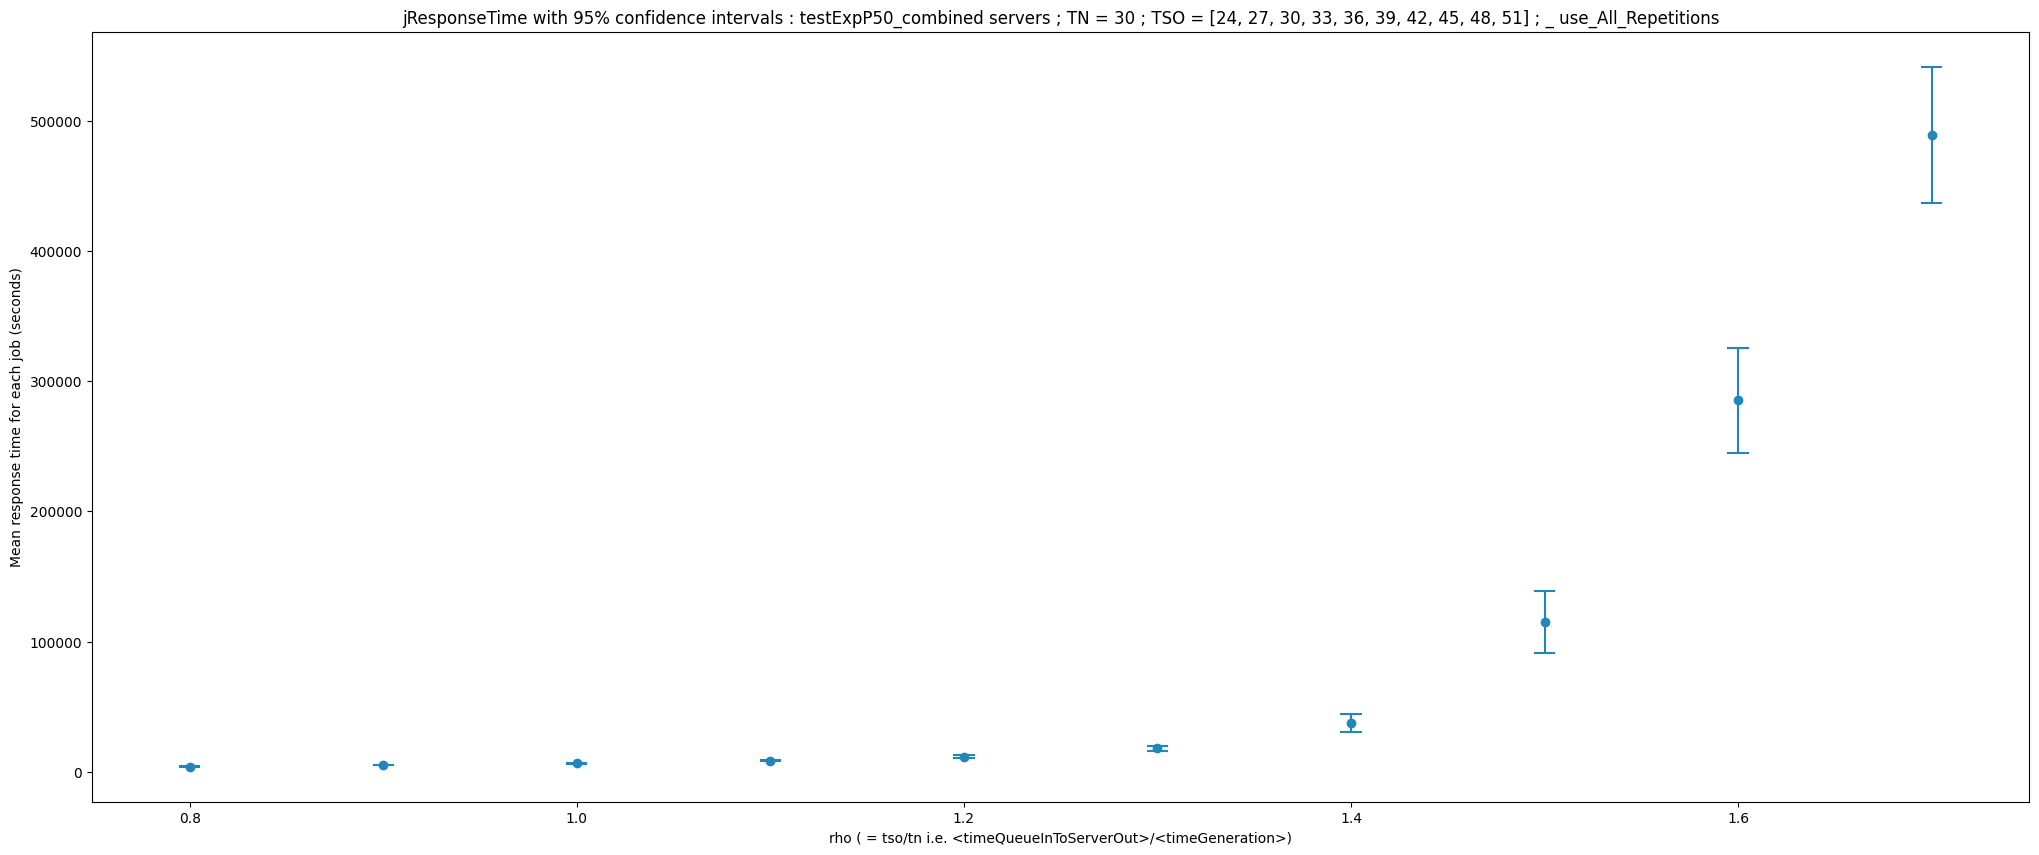

In [52]:


plot_dir = f'../images/plots' 

plt.rcParams["figure.figsize"] = (25, 10)
for tso_this_iter in range(0, len(target_tso), 1) :
    this_tso_averages = merged_array[tso_this_iter]
    #	print(this_tso_averages)
    #	print("tipo di this_tso_averages : ", type(this_tso_averages))
    #	print("tipo di this_tso_averages[0] : ", type(this_tso_averages[0]))
    #	print("tipo di target_tn : ", type(target_tn))
    #	#	tipo di this_tso_averages :  <class 'list'>
    #	#	tipo di this_tso_averages[0] :  <class 'float'>
    #	#	tipo di target_tn :  <class 'float'>
    this_mean , this_conf_int = plot_confidence_interval( float(target_tso[tso_this_iter])/float(target_tn) , np.array(this_tso_averages))
    print("tso_this_iter : ", target_tso[tso_this_iter], " ; this_mean : ", this_mean)
    #	print(this_conf_int)

#	rho = np.linspace(0.05, 2, 100)
#	rho = rho 
#	plt.plot(rho, rho**2/(1-rho)   , color='r', label="rho^2/(1-rho)")
#	plt.legend(loc="upper left")
    
extras = ["fast", "slow"]
name = f'jResponseTime with 95% confidence intervals : test{distribution}P{probability}_combined servers'
if use_all == True: 
    plt.title(f"{name} ; TN = 30 ; TSO = {target_tso} ; _ use_All_Repetitions")
    

plt.ylabel("Mean response time for each job (seconds)")
plt.xlabel("rho ( = tso/tn i.e. <timeQueueInToServerOut>/<timeGeneration>)")
    
save = False
if save == True:
    if use_all == True: 
        plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_Server{srvn}.png')
    else :
        plt.savefig(f'{plot_dir}/jResTime_ConfidenceIntervals_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_onlyIterZero_Server{srvn}.png')

plt.show()